<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2 - Ames Housing Data and Kaggle Challenge (Part 2)

### Contents:
- Pre-processing
- Modelling
- Conclusion (Summary Table)
- Business Recommendations

In [1]:
#Import pandas, numpy, matplotlib.pyplot and seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [3]:
#Importing the 'train.csv' and 'test.csv' datasets to clean and understand them

train = pd.read_csv('./train_before_dummy.csv')
test = pd.read_csv('./final_test.csv')

## Pre-processing

In [4]:
#These are catergorical features to dummy: 'Condition 1', 'Condition 2', 'Exter Qual', 'Exter Cond', 'Foundation'
#                              'Bsmt Qual', 'Bsmt Cond', 'Kitchen Qual', 'Functional', 'Garage Finish' 

In [5]:
train = pd.get_dummies(train, columns = ['Condition 1','Condition 2', 'Exter Qual', 'Exter Cond', 'Foundation',
             'Bsmt Qual', 'Bsmt Cond', 'Kitchen Qual', 'Functional', 'Garage Finish'], drop_first = True)

In [6]:
train.shape

(2049, 58)

In [7]:
#make sure that train and test have the same columns

In [8]:
test = pd.get_dummies(test, columns = ['Condition 1','Condition 2', 'Exter Qual', 'Exter Cond', 'Foundation',
             'Bsmt Qual', 'Bsmt Cond', 'Kitchen Qual', 'Functional', 'Garage Finish'], drop_first = True)

In [9]:
test.shape

(878, 49)

In [10]:
features = [col for col in train if col != 'SalePrice']

In [11]:
#Find the columns that is not available in 'Test.csv'

missing_cols = set(train.columns) - set(test.columns)
# Add a missing column in test with default value equal to 0
for i in missing_cols:
    test[i] = 0
# Ensure the order of columns in test is the same as in train
test = test[features]

In [12]:
#'Train.csv' has 1 more column then 'Test.csv'

train.shape

(2049, 58)

In [13]:
test.shape

(878, 57)

In [14]:
X = train[features]
y = train['SalePrice']

In [15]:
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=42)

In [16]:
ss = StandardScaler()
ss.fit(X_train)
X_train_sc = ss.transform(X_train)
X_val_sc = ss.transform(X_val)
test_sc = ss.transform(test)

## Modeling

### Baseline Model

In [17]:
#Baseline Score

y_hat = [np.mean(y_train) for i in y_val]
rsme = np.sqrt(mean_squared_error(y_val,y_hat))
print(f'RMSE: {rsme}')

RMSE: 79511.7311160395


### Linear Regression

In [18]:
#Linear Regression
lr = LinearRegression()

In [19]:
lr.fit(X_train_sc, y_train)

LinearRegression()

In [20]:
lr.score(X_train_sc, y_train)

0.8771935301449971

In [21]:
lr.score(X_val_sc,y_val)

0.8875778624009935

In [22]:
lr_scores = cross_val_score(lr, X_train_sc, y_train, cv=5)
lr_scores.mean()

-6.348629848968165e+23

In [23]:
lr_preds = lr.predict(X_val_sc)

In [24]:
mean_absolute_error(y_val,lr_preds)

19307.13327641493

In [25]:
#RMSE
lr_rsme = mean_squared_error(y_val,lr_preds) ** 0.5
print(f'Linear Regression RMSE: {lr_rsme}')

Linear Regression RMSE: 26659.81307475561


### Regularization: Lasso Model

In [26]:
lasso_cv = LassoCV(n_alphas=200)
lasso_cv.fit(X_train_sc, y_train)
print(lasso_cv.alpha_)

80.86291111056003


In [27]:
lasso = Lasso(alpha = lasso_cv.alpha_)

In [28]:
lasso_scores = cross_val_score(lasso, X_train_sc, y_train, cv=5)
lasso_scores.mean()

0.8645632002682422

In [29]:
lasso.fit(X_train_sc, y_train)

Lasso(alpha=80.86291111056003)

In [30]:
lasso.score(X_train_sc, y_train)

0.8767749891651748

In [31]:
lasso.score(X_val_sc, y_val)

0.8875842772756012

In [32]:
lasso_scores.mean()

0.8645632002682422

In [33]:
lasso_preds = lasso.predict(X_val_sc)

In [34]:
#rmse
rsme = mean_squared_error(y_val,lasso_preds) ** 0.5
print(f'Lasso RMSE: {rsme}')

Lasso RMSE: 26659.05245144209


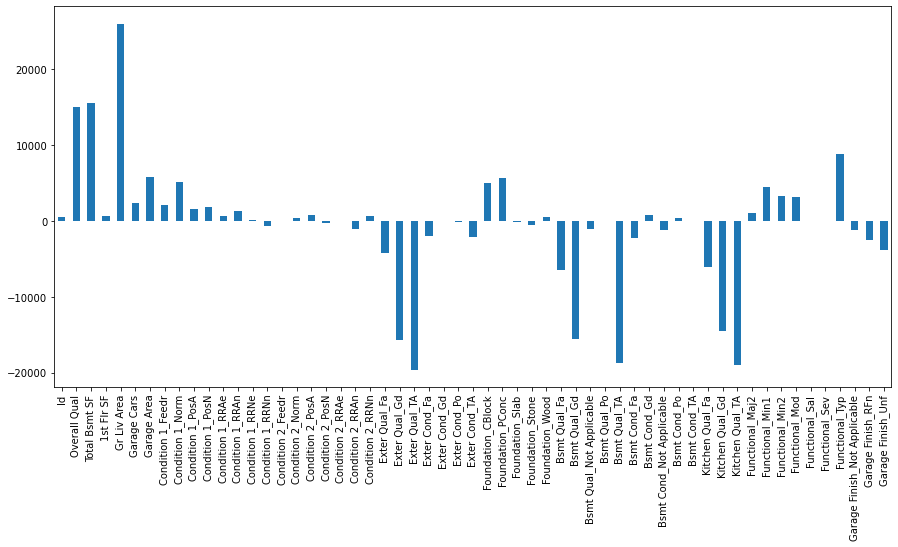

In [35]:
pd.Series(lasso.coef_, index=features).plot.bar(figsize=(15, 7));

In [36]:
lasso_features = pd.DataFrame({'feature': features,
                   'coef': lasso.coef_})

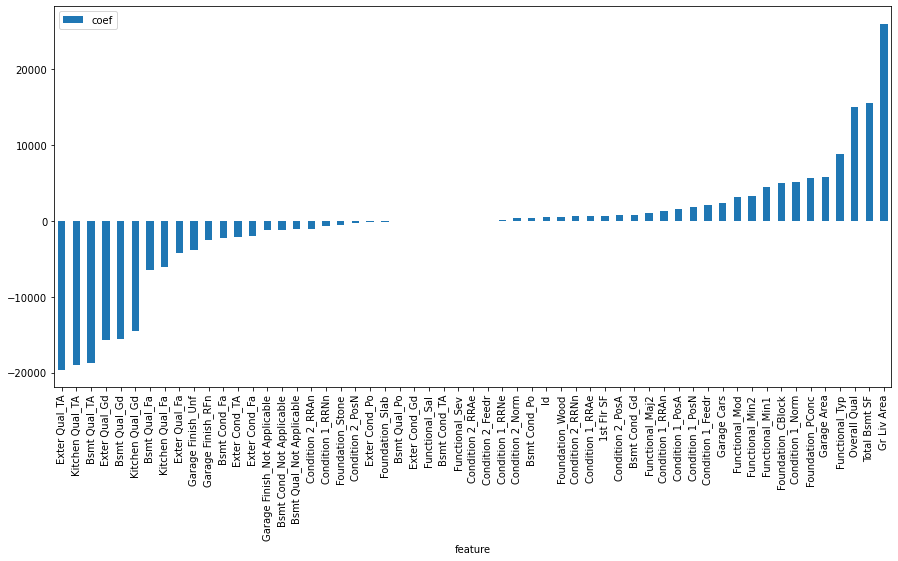

In [37]:
lasso_features.sort_values(by='coef', ascending = True).plot(kind='bar', x='feature', figsize =(15, 7));

### Regularization: Ridge Model

In [38]:
ridge_cv = RidgeCV(alphas = [0.1, 1, 10, 100])
ridge_cv.fit(X_train_sc, y_train)
print(ridge_cv.alpha_)

10.0


In [39]:
ridge = Ridge(alpha = ridge_cv.alpha_)

In [40]:
ridge_scores = cross_val_score(ridge, X_train_sc, y_train, cv=5)
ridge_scores.mean()

0.8643736404023417

In [41]:
ridge.fit(X_train_sc, y_train)

Ridge(alpha=10.0)

In [42]:
ridge.score(X_train_sc, y_train)

0.8769959121150226

In [43]:
ridge.score(X_val_sc, y_val)

0.8877541505121431

In [44]:
ridge_preds = ridge.predict(X_val_sc)

In [45]:
#rmse
ridge_rsme = mean_squared_error(y_val,ridge_preds)  ** 0.5
print(f'Ridge RMSE: {ridge_rsme}')

Ridge RMSE: 26638.90237127541


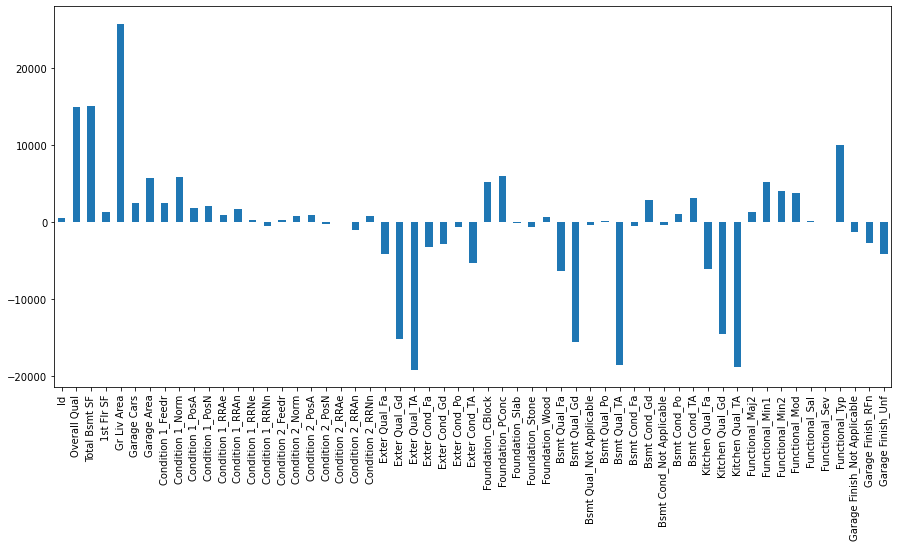

In [46]:
pd.Series(ridge.coef_, index=features).plot.bar(figsize=(15, 7));

In [47]:
ridge_features = pd.DataFrame({'feature': features,
                   'coef': ridge.coef_})

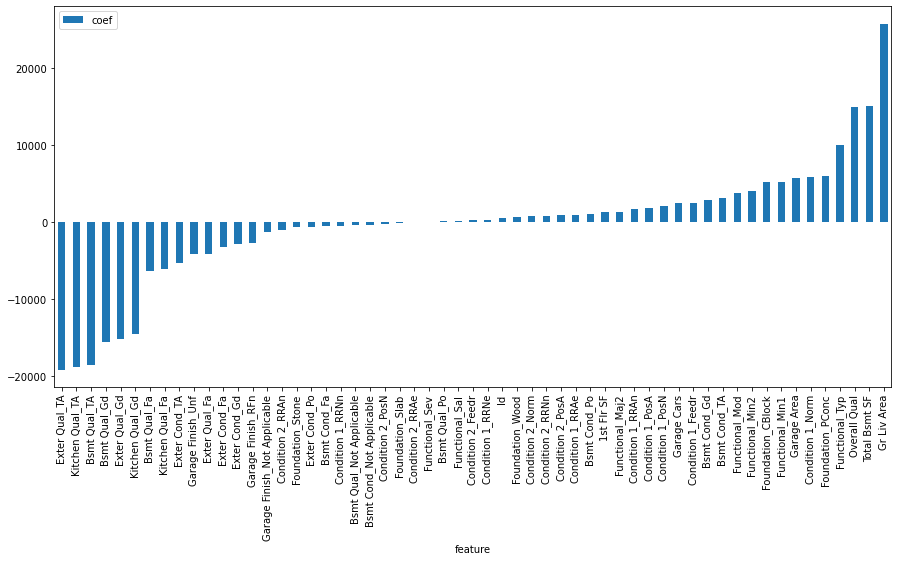

In [48]:
ridge_features.sort_values(by='coef', ascending = True).plot(kind='bar', x='feature', figsize =(15, 7));

## Prediction on 'Test.csv'

In [49]:
y_preds = lasso.predict(test_sc)

In [50]:
y_preds.shape

(878,)

In [51]:
submission = pd.DataFrame(y_preds, columns=['SalePrice'])
submission['Id'] = test['Id']
submission = submission[['Id','SalePrice']]

In [52]:
submission.shape

(878, 2)

In [53]:
submission.head()

,Id,SalePrice
0,2658,150032.966456
1,2718,231337.426961
2,2414,187315.407773
3,1989,129636.937093
4,625,180753.549453


In [54]:
submission.set_index('Id', inplace=True)
submission.head()

,SalePrice
Id,
2658,150032.966456
2718,231337.426961
2414,187315.407773
1989,129636.937093
625,180753.549453


In [55]:
submission.to_csv('submission.csv')

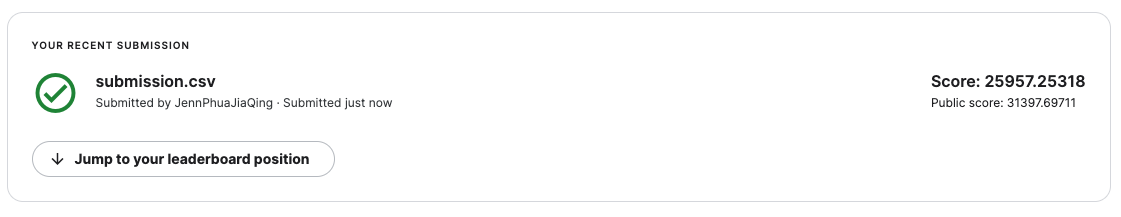

## Conclusion (Summary Table)

| **Types of Model**    | **Cross_val_score** | **Train** | **Test** | **Alpha** | **The Model I chose** |
|-----------------------|---------------------|-----------|----------|-----------|-----------------------|
| **Linear Regression** | -6.34               | 0.8772    | 0.8876   | NA        | No                    |
| **Lasso**             | 0.8646              | 0.8768    | 0.8876   | 80        | Yes                   |
| **Ridge**             | 0.8644              | 0.8770    | 0.8878   | 10        | No                    |

Both Ridge and Lasso Regression are similar. However, Ridge Regression takes the square of the coefficients and Lasso Regression takes the magnitude.

Ridge Regression decreases the complexity of a model but does not reduce the number of variables since it never leads to a coefficient been zero rather only minimizes it. Hence, this model is not good for feature reduction.

Lasso Regression adds penalty term to the cost function. This term is the absolute sum of the coefficients. As the value of coefficients increases from 0 this term penalizes, cause model, to decrease the value of coefficients in order to reduce loss. The difference between ridge and lasso regression is that it tends to make coefficients to absolute zero as compared to Ridge which never sets the value of coefficient to absolute zero.

Hence, despite Ridge Regression having a better test score than Lasso Regression. The difference is not big. I chose Lasso Regression as it helps to reduce the number of variables. 

## Business Recommendations

| **Top Features (from Lasso Model)** |
|-------------------------------------|
| _Gr Liv Area_                       |
| _Total Bmst SF_                     |
| _Overall Qual_                      |
| _Functional_Type_                   |
| _Garage Area_                       |

Now that we know what the top predictors are, we would have a unique selling point. These information would give us an edge over our competitors.

Firstly, we can further upsell the property. We can go straight to the point of explaining how is this the dream house that each customer is looking for. We can also be more persuasive when trying to seal the deal. This would help to make the buyers be able to have a smooth and exciting experience while looking for their dream house.

Secondly, as property agents, one would handle buyers and sellers. Knowing the features of the house would be able to aid us in coming up with a reasonable price range so that we can help our sellers sell their houses as fast as possible. We would also be able to manage their expectations. 

Our aim is to satisfy the needs of all customers. With the top predictors, we would be able to provide a efficient and fun experience for both buyers and sellers.

**References:**

10 common features of a “Perfect” house. (n.d.). By Carrier. https://bycarrier.com/blog/custom-homes/features-perfect-house/